In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

# データの読込み
df_ks = pd.read_csv("./data/kickstarter-projects/ks-projects-201801.csv")

# データ参照
print(df_ks.head())

##### 結果がでないと決定されないデータは使用しない #####
# backers, pledged, usd pledged, usd_pledged_real, usd_goal_real(?)

# 不要列を削除
df_ks = df_ks.drop('ID', axis=1).drop('name', axis=1)
df_ks = df_ks.drop('backers', axis=1).drop('pledged', axis=1).drop('usd pledged', axis=1).drop('usd_pledged_real', axis=1).drop('usd_goal_real', axis=1)

# データ参照
df_ks.head()



           ID  ... usd_goal_real
0  1000002330  ...       1533.95
1  1000003930  ...      30000.00
2  1000004038  ...      45000.00
3  1000007540  ...       5000.00
4  1000011046  ...      19500.00

[5 rows x 15 columns]


,category,main_category,currency,deadline,goal,launched,state,country
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,US
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,US
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,US


In [0]:
# 日付計算
import datetime
from datetime import datetime as dt

def str_to_datetime1(t):
    return datetime.datetime.strptime(t, '%Y-%m-%d')

def str_to_datetime2(t):
    return datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S')

def delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/(60*60*24)


# 開始日時、終了日を日付型に変換
df_ks['datetime_1'] = df_ks['launched'].apply(str_to_datetime2)
df_ks['datetime_2'] = df_ks['deadline'].apply(str_to_datetime1) 

# 開始日時、終了日の差を計算
df_ks['delta'] = df_ks[['datetime_1', 'datetime_2']].apply(delta, axis=1)
# print(df_ks['delta'])

# 計算用列を削除
df_ks = df_ks.drop('datetime_1', axis=1).drop('datetime_2', axis=1)
df_ks = df_ks.drop('launched', axis=1).drop('deadline', axis=1)

# データ参照
df_ks.head()


,category,main_category,currency,goal,state,country,delta
0,Poetry,Publishing,GBP,1000.0,failed,GB,58.491343
1,Narrative Film,Film & Video,USD,30000.0,failed,US,59.802813
2,Narrative Film,Film & Video,USD,45000.0,failed,US,44.985532
3,Music,Music,USD,5000.0,failed,US,29.858206
4,Film & Video,Film & Video,USD,19500.0,canceled,US,55.642326


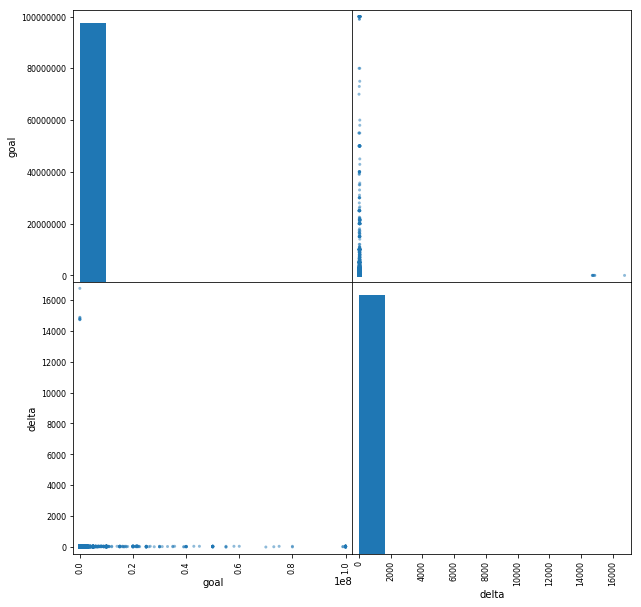

In [0]:
# 散布図（ダミーデータ作成前）
pd.plotting.scatter_matrix(df_ks, figsize=(10,10))
plt.show()


In [0]:
# ダミーデータ作成
df_ks = pd.get_dummies(df_ks, columns=['category'])
df_ks = pd.get_dummies(df_ks, columns=['main_category'])
df_ks = pd.get_dummies(df_ks, columns=['currency'])
df_ks = pd.get_dummies(df_ks, columns=['country'])
df_ks = pd.get_dummies(df_ks, columns=['state'])

# 列削除
# df_ks = df_ks.drop('state_canceled', axis=1).drop('state_failed', axis=1).drop('state_live', axis=1).drop('state_suspended', axis=1).drop('state_undefined', axis=1)

# データ参照
print(df_ks.head())

# 欠損値を削除
df_ks = df_ks.dropna(how='any')



      goal      delta  ...  state_suspended  state_undefined
0   1000.0  58.491343  ...                0                0
1  30000.0  59.802813  ...                0                0
2  45000.0  44.985532  ...                0                0
3   5000.0  29.858206  ...                0                0
4  19500.0  55.642326  ...                0                0

[5 rows x 219 columns]


,goal,delta,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,1000.0,58.491343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,30000.0,59.802813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,45000.0,44.985532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,5000.0,29.858206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,19500.0,55.642326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [0]:
# goal、deltaの正規化


# データ参照
df_ks.head()


,goal,delta,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,1000.0,58.491343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,30000.0,59.802813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,45000.0,44.985532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,5000.0,29.858206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,19500.0,55.642326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [0]:
# 散布図
pd.plotting.scatter_matrix(df_ks, figsize=(10,10))
plt.show()




In [0]:
# Scikit-learnを用いてロジスティック回帰
Y = df_ks["state_successful"].values
X = df_ks.drop('state_successful', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, Y)


# 重みを取得して表示(w0)
w0 = clf.intercept_[0]
# 重みを取得して表示(w1-)
for i in range(len(clf.coef_[0])):
    print("w{0} = ".format(clf.coef_[0, i]))

